In [4]:
import cv2

# Load the image
image = cv2.imread(r"C:\Users\Purvitha S\OneDrive\Desktop\CV\building.jpeg.jpg", cv2.IMREAD_GRAYSCALE)

# Find the minimum and maximum pixel values
min_pixel = image.min()
max_pixel = image.max()

print(f'Minimum pixel value: {min_pixel}')
print(f'Maximum pixel value: {max_pixel}')

Minimum pixel value: 5
Maximum pixel value: 255


In [6]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


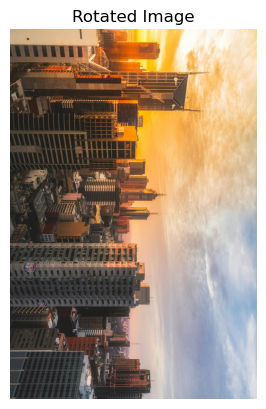

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
image = cv2.imread(r"C:\Users\Purvitha S\OneDrive\Desktop\CV\building.jpeg.jpg")

# Function to display images
def show_image(title, img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Rotate the image by 90 degrees
rotated = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
show_image('Rotated Image', rotated)

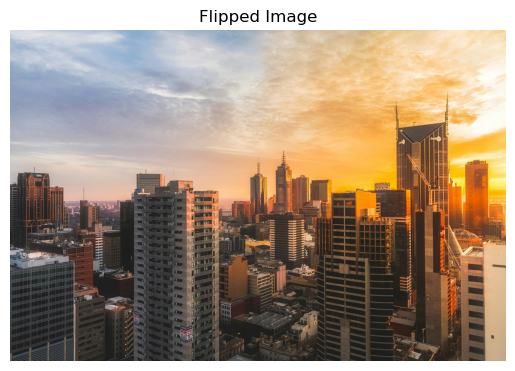

In [10]:
# Flip the image horizontally
flipped = cv2.flip(image, 1)
show_image('Flipped Image', flipped)


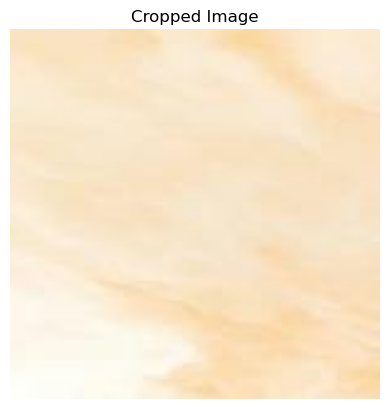

In [12]:
# Crop the image
cropped = image[50:200, 50:200]
show_image('Cropped Image', cropped)

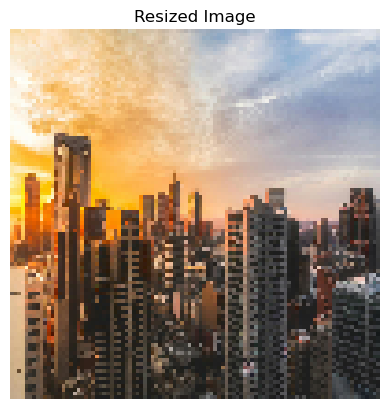

In [14]:
# Resize the image
resized = cv2.resize(image, (100, 100))
show_image('Resized Image', resized)

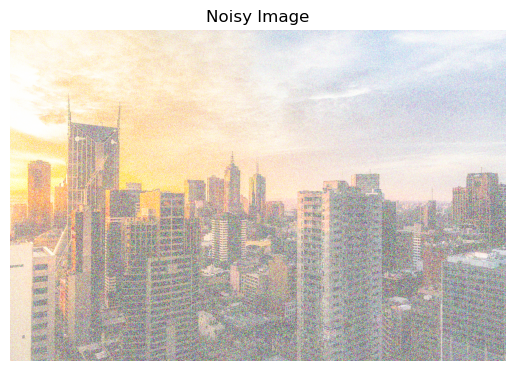

In [16]:
# Add Gaussian noise
noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)
show_image('Noisy Image', noisy_image)

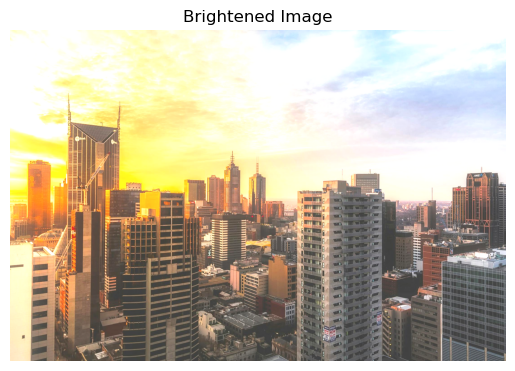

In [18]:
# Change brightness
brightened = cv2.convertScaleAbs(image, alpha=1.2, beta=30)
show_image('Brightened Image', brightened)

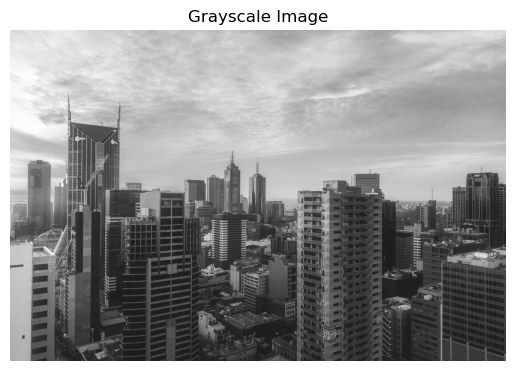

In [20]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image('Grayscale Image', gray)

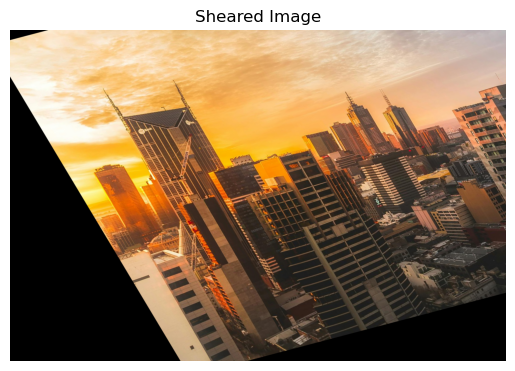

In [22]:
# Shear transformation
rows, cols, ch = image.shape
pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])
M = cv2.getAffineTransform(pts1, pts2)
sheared = cv2.warpAffine(image, M, (cols, rows))
show_image('Sheared Image', sheared)

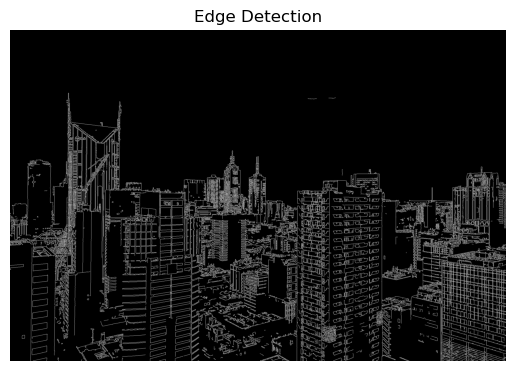

In [24]:
def detect_edges(image, threshold1=100, threshold2=200):
    return cv2.Canny(image, threshold1, threshold2)

edges = detect_edges(gray)
show_image('Edge Detection', edges)


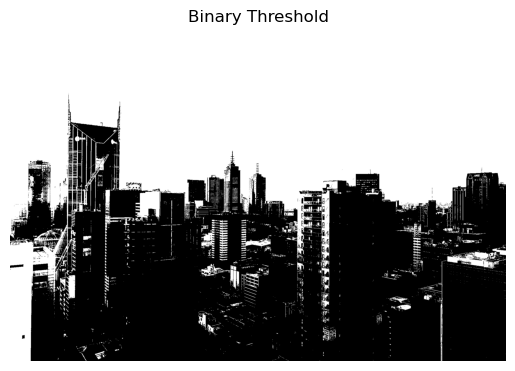

In [30]:
def apply_threshold(image, threshold=127):
    _, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary

binary = apply_threshold(gray)
show_image('Binary Threshold', binary)

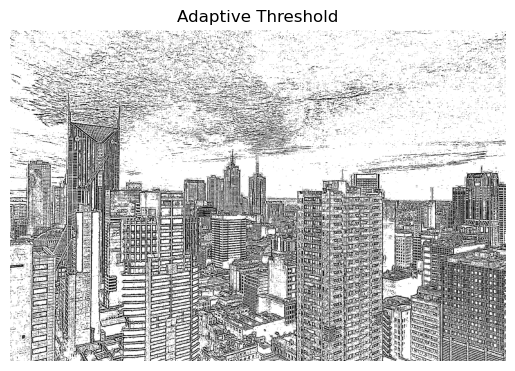

In [32]:
def apply_adaptive_threshold(image):
    return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

adaptive = apply_adaptive_threshold(gray)
show_image('Adaptive Threshold', adaptive)

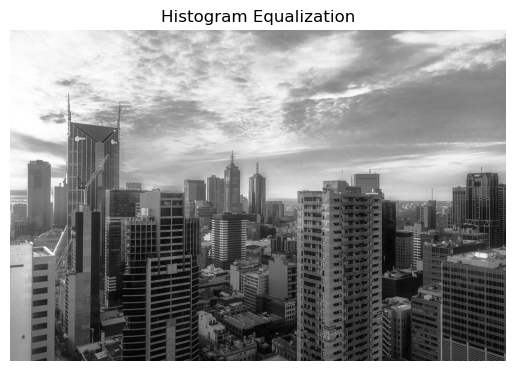

In [34]:
def equalize_histogram(image):
    return cv2.equalizeHist(image)

equalized = equalize_histogram(gray)
show_image('Histogram Equalization', equalized)

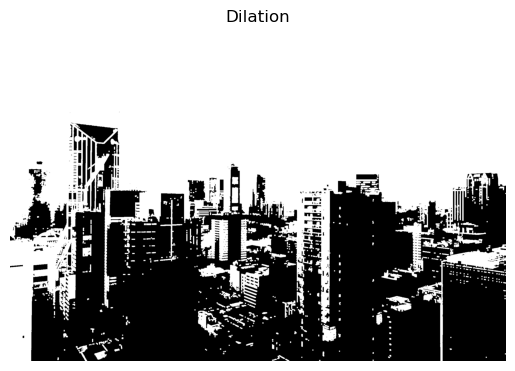

In [36]:
def apply_dilation(image, kernel_size=(5, 5)):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    return cv2.dilate(image, kernel, iterations=1)

dilated = apply_dilation(binary)
show_image('Dilation', dilated)